In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pow

In [48]:
def qroot(a):
    return pow(a, 1/3) if a >=0 else -pow(abs(a), 1/3)

#### Методы численного решения уравнений

In [ ]:
# Метод бисекции, func(a)*func(b) < 0
def bisect(func, a, b, eps):
    
    while abs(a-b) > eps:
        c = (b+a)/2
        if func(c)*func(a) < 0:
            b = c
        else:
            a = c

    return (a+b)/2

# Метод Ньютона
def newton(f, f_prime, x0, eps=1e-11, max_iter=1000000):

	x, x_prev, i = x0, x0 + 2 * eps, 0

	while abs(x - x_prev) >= eps and i < max_iter:
		x_m_1 = x_prev
		x, x_prev, i = x - f(x) / f_prime(x), x, i + 1
		
	print(f"p={(1 - (x - x_prev) / (x_prev  - x_m_1)) ** -1}")		# Оценка кратности корня


	return x

#### Метод Ньютона для систем уравнений

In [12]:
# Метод Ньютона для вектор-функций
def newton_sys(F, dF, x0, eps=1e-7, max_iter=10000000):

	x, x_prev, i = x0, x0 + 2 * eps, 0

	while np.linalg.norm(x - x_prev) >= eps and i < max_iter:
		dx = np.linalg.solve(dF(x), -F(x))
		x, x_prev, i = x + dx, x, i + 1

	return x

#### Проверка методов

In [ ]:
eps = 1e-12
a = -10
b = 10

def func(x):
    return (x-np.pi)**9

def deriv_1(x):
    return 9*(x-np.pi)**8

x = bisect(func, a, b, eps)
x = newton(func, deriv_1, 5)

print(f'{x:.13f}')    

3.1415926535900


#### Проверка метода Ньютона для системы из 2х уравнений

[[27 -1]
 [ 9 -3]]
----------
[2.28291289 3.89783722]


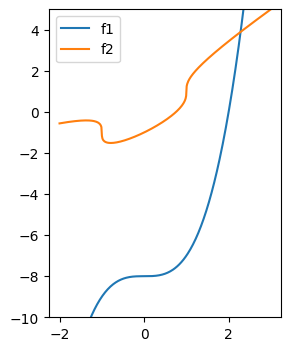

In [51]:

# f1 и производные
def f1(x, y):
    return x**3 - y - 8

def df1x(x, y):
    return 3*x**2

def df1y(x, y):
    return -1

# f2 и производные
def f2(x, y):
    return (x - y)**3 + x**2 - 1

def df2x(x, y):
    return 3*(x-y)**2 +2*x

def df2y(x, y):
    return -3*(x-y)**2

# Система F из f1 и f2
def F(X):
    x, y = X
    return np.array([f1(x, y), f2(x, y)])

def dF(X):
    x, y = X
    return np.array([df1x(x, y), df1y(x, y), df2x(x, y), df2y(x, y)]).reshape((2, 2))

X = np.array([3, 4])

print(dF(X))
print("----------")

print(newton_sys(F, dF, X))


x = np.linspace(-2, 3, 400)
y1 = [xi**3-8 for xi in x]
y2 = [xi-qroot(1-xi**2) for xi in x]

fig = plt.figure(figsize=(3,4))
plt.plot(x, y1, label='f1')
plt.plot(x, y2, label='f2')
plt.ylim((-10,5))
plt.legend()
plt.show()